In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# importando bibliotecas necessária para o código
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pylab
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline


In [14]:
uri = '/content/drive/Shareddrives/Colab_Grupo2/Colab/Data/dataFrameSelecionado.csv'
data = pd.read_csv(uri)	

In [16]:
#Definindo qual será a variável target
X = data.drop(['follow_up_classified'], axis = 1)
y = data['follow_up_classified']

In [17]:
#Definição de treino e teste
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [18]:
#Número de vizinhos
k = 5

#Treinando o modelo
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)
Pred_y = neigh.predict(X_test)

#Medindo a acurácia

#Avaliando sem o uso de hiperparâmetros
print('Classification metrics: \n', classification_report(y_test, Pred_y))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, Pred_y)

print('MSE (Mean-Squared-Error): %s' %mse)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74       286
           1       0.59      0.67      0.63       249
           2       0.95      0.69      0.80       261

    accuracy                           0.72       796
   macro avg       0.74      0.72      0.72       796
weighted avg       0.75      0.72      0.72       796

MSE (Mean-Squared-Error): 0.3756281407035176


Minimum error:- 0.2776381909547739 at K = 2


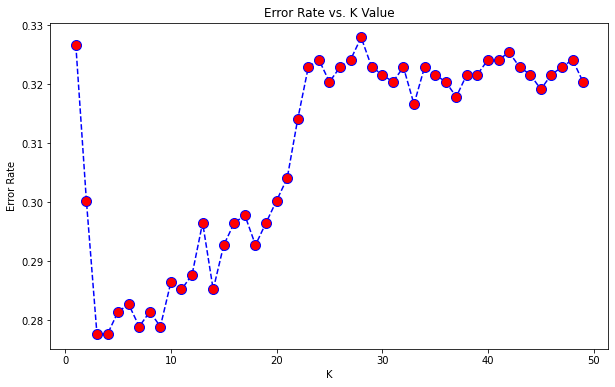

In [19]:
#Medir o erro de cada valor K

#Adicionar na váriavel error rate o tanto de erro
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

#Imprimir gráfico
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7223618090452262 at K = 2


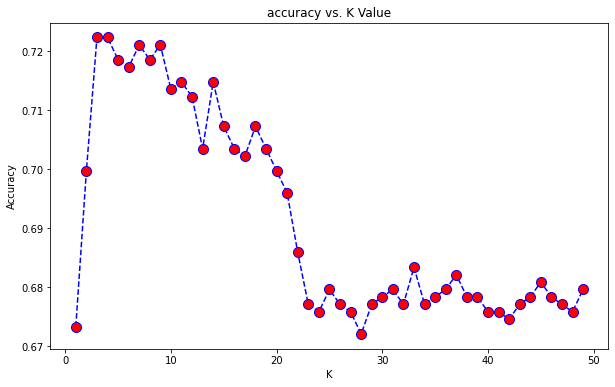

In [20]:
#Medir a acurácia de cada valor K e adicionar na lista acc
acc = []

#Medir acurácia dos vizinhos de 1 a 50
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

#Imprimir gráfico
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))



In [21]:
metric_params = {'n_neighbors': [5,6,7,8,9,10,11],
               'weights': ['uniform','distance'],
               'metric': ['euclidean','manhattan']
               }
gs =  GridSearchCV(neigh,
                   metric_params,
                   verbose = 1,
                   cv = 100,
                   n_jobs = -1)

gsresult = gs.fit(X_train,y_train)

Pred_y = gs.predict(X_test)

#Medindo a acurácia

#Avaliando com o uso de hiperparâmetros
print('Classification metrics: \n', classification_report(y_test, Pred_y))

#Medindo a taxa de erro do modelo

mse = metrics.mean_squared_error(y_test, Pred_y)

print('MSE (Mean-Squared-Error): %s' %mse)


Fitting 100 folds for each of 28 candidates, totalling 2800 fits
Classification metrics: 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       286
           1       0.59      0.66      0.62       249
           2       0.97      0.68      0.80       261

    accuracy                           0.72       796
   macro avg       0.75      0.72      0.72       796
weighted avg       0.75      0.72      0.72       796

MSE (Mean-Squared-Error): 0.36809045226130654


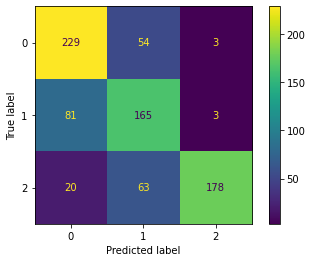

In [22]:
#Exibindo a matriz de confusão dos resultados preditos
ConfusionMatrixDisplay(confusion_matrix(y_test, Pred_y)).plot()

In [23]:
#Construindo a base do Pipeline
pipe_rf = Pipeline([('gs', KNeighborsClassifier())])


In [24]:
#Treinando o modelo com Pipeline
model = pipe_rf.fit(X_train, y_train)


In [25]:
#Calculando y_score
y_score = model.predict_proba(X_test)

In [26]:
#Declarando valores unicos de classes em ordem
n_binaries = y_test.unique()
n_binaries.sort()

#Binarizando a saída
y_test_bin = label_binarize(y_test, classes=n_binaries)
n_classes = y_test_bin.shape[1]


AUC for Class 0: 0.8653503359385712
AUC for Class 1: 0.7921558262299655
AUC for Class 2: 0.8810362731406883


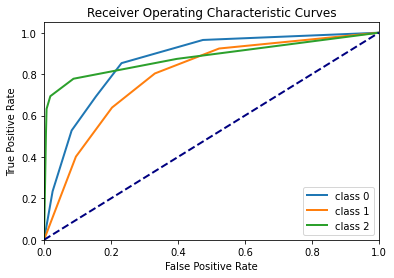

In [27]:
#Calculando e exibindo curva ROC das classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))
  print('AUC for Class {}: {}'.format(i, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--' )
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()